# About Dataset

ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. You're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer.

 ## Importing important libraries and dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso , SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [7]:
df= pd.read_csv("C:\\Users\\aishw\\Downloads\\expenses.csv")

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df.shape

(1338, 7)

In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [13]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [14]:
df['age'].value_counts()

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64

since all the ages are in integer form then we will change the data type from float to integer.

In [15]:
df['age'] = df['age'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [16]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [17]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

## EDA

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


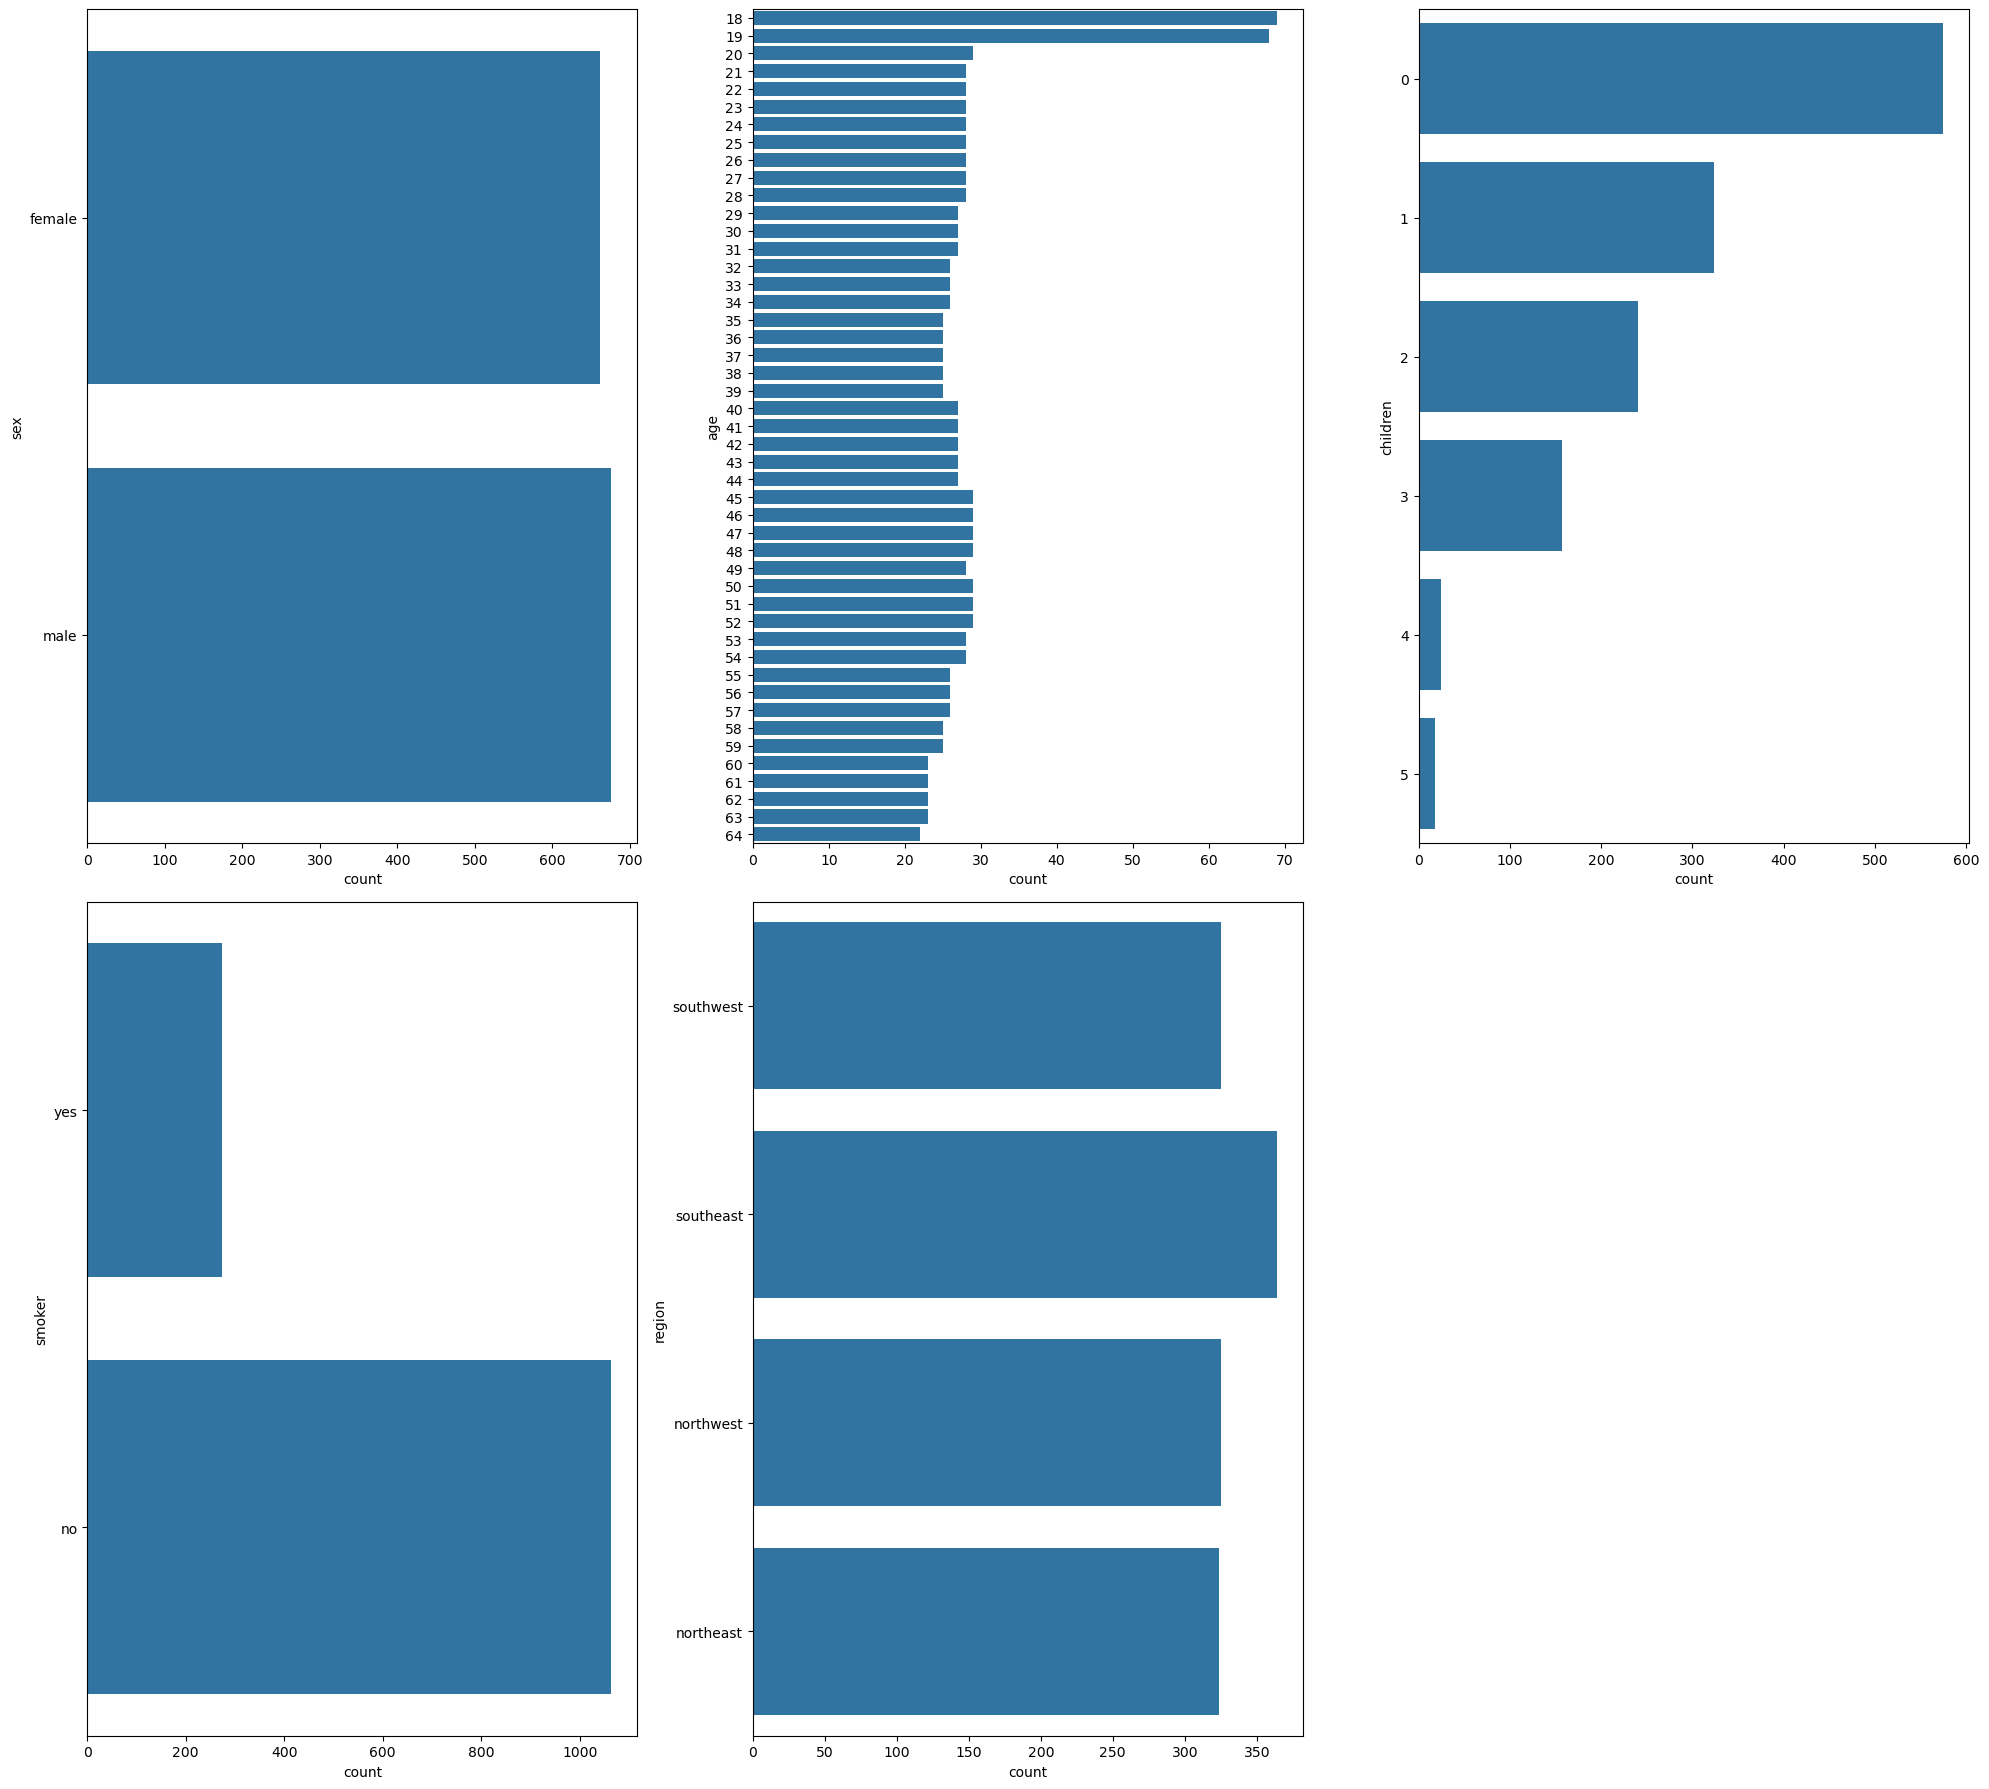

In [19]:
# count plot
plt.figure(figsize=(20,18))
plt.subplot(2,3,1)
sns.countplot(data=df,y='sex')
plt.subplot(2,3,2)
sns.countplot(data=df,y='age')
plt.subplot(2,3,3)
sns.countplot(data=df,y='children')
plt.subplot(2,3,4)
sns.countplot(data=df,y='smoker')
plt.subplot(2,3,5)
sns.countplot(data=df,y='region')
plt.tight_layout()
plt.show()

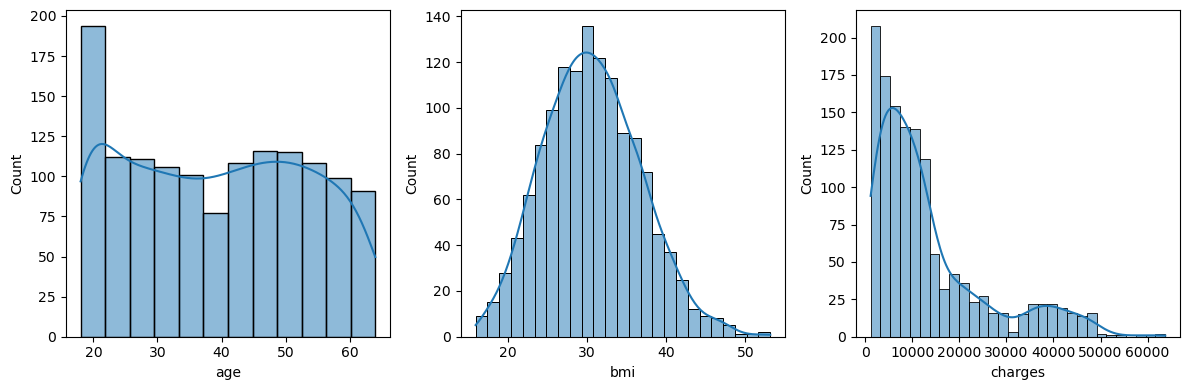

In [20]:
# histplot
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(data=df,x='age',kde=True)
plt.subplot(1,3,2)
sns.histplot(data=df,x='bmi',kde=True)
plt.subplot(1,3,3)
sns.histplot(data=df,x='charges',kde=True)
plt.tight_layout()
plt.show()

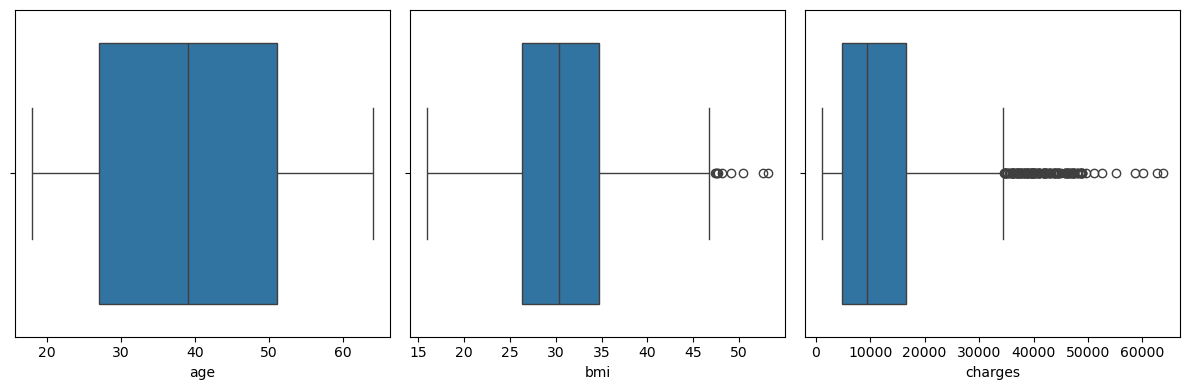

In [21]:
#boxplot
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.boxplot(data=df,x='age')
plt.subplot(1,3,2)
sns.boxplot(data=df,x='bmi')
plt.subplot(1,3,3)
sns.boxplot(data=df,x='charges')
plt.tight_layout()
plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [23]:
df['age'].skew()

0.05567251565299186

<Axes: >

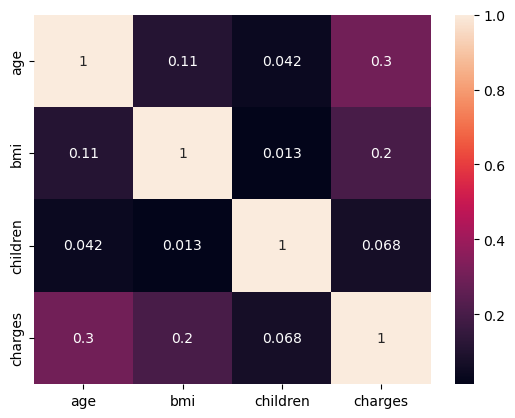

In [24]:
#heatmap
sns.heatmap(data=df.drop(columns=['sex','smoker','region']).corr(),annot=True)

##### Observations
- There is an expected high positive correlation between age and charges.
- We can also observe a significant positive correlation between bmi and charges.

## Handling the outliers

In [25]:
df['bmi'].skew()

0.2840471105987448

bmi is positively skewed
hence triming the outliers using the percentile method

In [26]:
df['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [27]:
u= df['bmi'].quantile(0.99)
l= df['bmi'].quantile(0.01)
print(f"upper limit = {u} and lower limit = {l}")

upper limit = 46.40789999999996 and lower limit = 17.895149999999997


In [28]:
df[(df['bmi']<l) | (df['bmi']>u)].value_counts().sum()

28

so there are some data entries that we are going to remove

In [29]:
df=df[(df['bmi']>=l) & (df['bmi']<=u)]

In [30]:
df.shape

(1310, 7)

In [31]:
df.describe()

,age,bmi,children,charges
count,1310.000000,1310.000000,1310.000000,1310.000000
mean,39.343511,30.617618,1.091603,13299.520075
std,14.045637,5.716744,1.206998,12030.401094
min,18.000000,17.955000,0.000000,1121.873900
25%,27.000000,26.400000,0.000000,4763.252250
50%,40.000000,30.400000,1.000000,9412.962500
75%,51.000000,34.485000,2.000000,16862.795985
max,64.000000,46.200000,5.000000,62592.873090


<Axes: xlabel='bmi'>

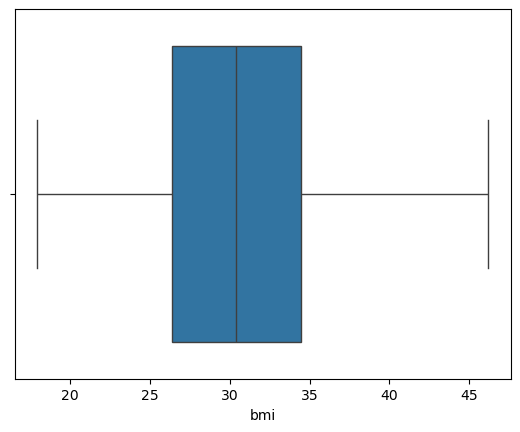

In [32]:
sns.boxplot(data=df,x='bmi')

In [33]:
df['bmi'].skew()

0.18381570091553498

## Spliting the data into training and testing

In [34]:
x_train,x_test,y_train,y_test= train_test_split(df.drop(columns=['charges']),df['charges'],test_size=0.2,random_state=42)

## Scaling and Encoding

The age variable shows no extreme outliers and only mild skewness. Therefore, mean–variance scaling is appropriate, and StandardScaler is applied.
And similar logic for bmi.

In [35]:
x_train.head()

,age,sex,bmi,children,smoker,region
203,27,female,36.08,0,yes,southeast
310,50,male,26.60,0,no,southwest
494,21,male,25.70,4,yes,southwest
338,50,male,32.30,1,yes,northeast
10,25,male,26.22,0,no,northeast


In [36]:
ct = ColumnTransformer([('one',OneHotEncoder(drop='first',sparse_output=False),[1,4,5]),
                         ('scl',StandardScaler(),[0,2])
],remainder='passthrough')

In [37]:
x_train=ct.fit_transform(x_train)

In [38]:
x_test= ct.transform(x_test)

In [39]:
df1 = pd.DataFrame(
    x_train,
    columns=ct.get_feature_names_out()
)

In [40]:
df2= pd.DataFrame(
    x_test,
    columns= ct.get_feature_names_out()
)

In [41]:
df1.sample(10)

,one__sex_male,one__smoker_yes,one__region_northwest,one__region_southeast,one__region_southwest,scl__age,scl__bmi,remainder__children
247,1.0,1.0,1.0,0.0,0.0,-0.393538,-0.483684,1.0
963,1.0,0.0,1.0,0.0,0.0,1.245059,0.159697,0.0
127,0.0,0.0,1.0,0.0,0.0,1.530033,0.093709,0.0
357,1.0,1.0,1.0,0.0,0.0,-1.390945,-0.450690,1.0
866,0.0,0.0,0.0,0.0,1.0,1.743763,1.576698,0.0
287,1.0,0.0,0.0,0.0,1.0,1.245059,2.271307,1.0
449,1.0,1.0,0.0,0.0,1.0,1.458789,0.378499,0.0
798,1.0,0.0,0.0,1.0,0.0,-0.251051,0.661552,2.0
930,1.0,0.0,0.0,0.0,0.0,1.743763,-0.731138,0.0
979,0.0,0.0,1.0,0.0,0.0,-1.462188,-1.044581,1.0


In [42]:
x= pd.concat([df1, df2], axis=0)
y= pd.concat([y_train,y_test],axis=0)

In [43]:
x.head()

,one__sex_male,one__smoker_yes,one__region_northwest,one__region_southeast,one__region_southwest,scl__age,scl__bmi,remainder__children
0,0.0,1.0,0.0,1.0,0.0,-0.892241,0.948078,0.0
1,1.0,0.0,0.0,0.0,1.0,0.746356,-0.698145,0.0
2,1.0,1.0,0.0,0.0,1.0,-1.319702,-0.854432,4.0
3,1.0,1.0,0.0,0.0,0.0,0.746356,0.291673,1.0
4,1.0,0.0,0.0,0.0,0.0,-1.034728,-0.764132,0.0


## Finding the best model

## Linear regression

In [44]:
lr= LinearRegression()

In [45]:
lr.fit(x_train,y_train)

LinearRegression()

In [46]:
y_lr_predict= lr.predict(x_test)

In [47]:
r2_score(y_test,y_lr_predict)

0.7584540850092496

In [48]:
np.sqrt(mean_squared_error(y_test,y_lr_predict))

6147.408906341902

In [49]:
mean_absolute_error(y_test,y_lr_predict)

4275.179113586407

In [50]:
cv = RepeatedKFold(
    n_splits=5,
    n_repeats=10,
    random_state=42
)
scores = cross_val_score(
    lr,
    x,
    y,
    cv=cv,
    scoring='r2'
)

print("Average R2:", scores.mean())

Average R2: 0.7450819142049877


## Stocastic gradient decent regression

In [51]:
sgd = SGDRegressor(max_iter=100,learning_rate='constant',eta0=0.01)

In [52]:
sgd.fit(x_train, y_train)

SGDRegressor(learning_rate='constant', max_iter=100)

In [53]:
y_sgd_predict= sgd.predict(x_test)

In [54]:
r2_score(y_test,y_sgd_predict)

0.7496082609282466

In [55]:
np.sqrt(mean_squared_error(y_test,y_sgd_predict))

6258.96108997816

In [56]:
mean_absolute_error(y_test,y_sgd_predict)

4348.562355369548

In [57]:
cv = RepeatedKFold(
    n_splits=5,
    n_repeats=10,
    random_state=42
)
scores = cross_val_score(
    sgd,
    x,
    y,
    cv=cv,
    scoring='r2'
)

print("Average R2:", scores.mean())

Average R2: 0.7368990612264374


In [133]:
p = np.sum(sgd.coef_ != 0)
adj_r2_sgd = 1 - (1 - scores.mean()) * (n - 1) / (n - p - 1)
adj_r2_sgd

0.7370212686004795

## Ridge regression

In [58]:
# we need to find the optimal value of alpha for which we get the best result
rse = {}
r_sq = {}
b= np.logspace(-4, 2, 100)
for a in b:
    rid = Ridge(alpha=a)
    rid.fit(x_train, y_train)

    y_pred_rid = rid.predict(x_test)

    rse[a] = np.sqrt(mean_squared_error(y_test, y_pred_rid))
    r_sq[a] = r2_score(y_test, y_pred_rid)


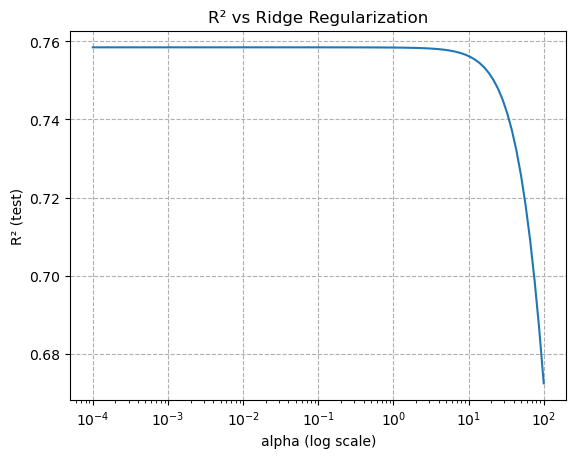

In [59]:
plt.semilogx(b, r_sq.values())
plt.xlabel("alpha (log scale)")
plt.ylabel("R² (test)")
plt.title("R² vs Ridge Regularization")
plt.grid(ls='--')
plt.show()

From the R² vs Ridge regularization plot (log-scale), we observe that performance remains stable for small α, peaks at moderate α, and degrades rapidly for large α due to underfitting. This indicates that mild regularization provides the optimal bias–variance trade-off for the given PCA-transformed features.

- Final conclusion

The optimal Ridge regularization strength lies in the moderate range (α ≈ 1 to 5). Weak regularization does little, while strong regularization leads to underfitting.

- Bias–variance trade-off explanation 

    - Small α → low bias, acceptable variance

    - Moderate α → best bias–variance trade-off

    - Large α → high bias, underfitting



In [60]:
# to select best alpha
best_alpha = max(r_sq, key=r_sq.get)
best_r2 = r_sq[best_alpha]

print("Best alpha:", best_alpha)
print("Best R²:", best_r2)

Best alpha: 0.0001
Best R²: 0.7584540813220644


In [61]:
rid = Ridge(alpha=0.0001)
rid.fit(x_train, y_train)
y_pred_rid = rid.predict(x_test)

In [62]:
cv = RepeatedKFold(
    n_splits=5,
    n_repeats=10,
    random_state=42
)
scores = cross_val_score(
    rid,
    x,
    y,
    cv=cv
)

scores

array([0.73483245, 0.76999699, 0.71101841, 0.76855229, 0.74910194,
       0.74149361, 0.70122941, 0.75846978, 0.75083459, 0.77199965,
       0.77095458, 0.7164767 , 0.76095439, 0.7627219 , 0.72367305,
       0.74561425, 0.76185373, 0.7031453 , 0.79104589, 0.70335743,
       0.75231181, 0.75774964, 0.73071981, 0.73853983, 0.74961432,
       0.72992712, 0.67514037, 0.78776057, 0.73327367, 0.79074912,
       0.74257641, 0.75536531, 0.7533163 , 0.75352232, 0.71770411,
       0.75191261, 0.77140539, 0.77054338, 0.73133429, 0.69205225,
       0.75390133, 0.74617823, 0.74130085, 0.75195971, 0.75012605,
       0.67508803, 0.78611529, 0.78651189, 0.76464834, 0.71542128])

## Lasso regression

In [63]:
rse = {}
r_sq = {}

b= np.logspace(-4, 7, 100)
for a in b:
    las = Lasso(alpha=a)
    las.fit(x_train, y_train)

    y_pred_las = las.predict(x_test)

    rse[a] = np.sqrt(mean_squared_error(y_test, y_pred_las))
    r_sq[a] = r2_score(y_test, y_pred_las)

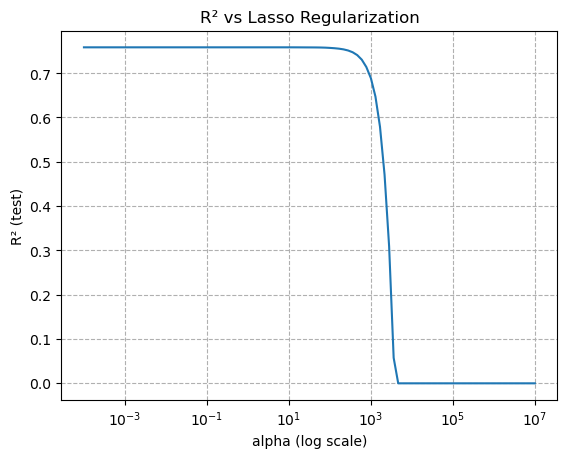

In [64]:
plt.semilogx(b, r_sq.values())
plt.xlabel("alpha (log scale)")
plt.ylabel("R² (test)")
plt.title("R² vs Lasso Regularization")
plt.grid(ls='--')
plt.show()

The R² vs Lasso regularization curve shows a sharp degradation in performance beyond moderate α values, indicating aggressive sparsity.

In [65]:
best_alpha = max(r_sq, key=r_sq.get)

print("Selected alpha:", best_alpha)

Selected alpha: 4.641588833612772


In [66]:
las = Lasso(alpha=0.0001)
las.fit(x_train, y_train)
y_pred_las = las.predict(x_test)


In [67]:
r2_score(y_test,y_pred_las)

0.7584540853680326

In [68]:
rse =np.sqrt( mean_squared_error(y_test, y_pred_las))

In [69]:
rse

6147.408901776342

In [70]:
model=[lr,sgd,rid,las]
comp= pd.DataFrame(index=range(len(model)),columns=['model','r2_score','sqrt_mse','mae'])  
comp

,model,r2_score,sqrt_mse,mae
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN


In [71]:
for i in range(0,4):
    model[i].fit(x_train,y_train)
    y_pred= model[i].predict(x_test)
    r2= round(r2_score(y_test,y_pred),4)
    sqrt_mse=round( np.sqrt(mean_squared_error(y_test,y_pred)),4)
    mae= round(mean_absolute_error(y_test,y_pred),4)
    comp.iloc[i,]= [model[i],r2,sqrt_mse,mae]

In [72]:
comp

,model,r2_score,sqrt_mse,mae
0,LinearRegression(),0.7585,6147.4089,4275.1791
1,"SGDRegressor(learning_rate='constant', max_ite...",0.748,6278.9072,4302.0484
2,Ridge(alpha=0.0001),0.7585,6147.409,4275.18
3,Lasso(alpha=0.0001),0.7585,6147.4089,4275.1791


All linear models show similar performance with an R² of approximately 0.76, indicating a stable linear relationship between predictors and the target. Regularization with small penalty terms does not significantly improve performance.

In [73]:
#now using cross val score
cv = RepeatedKFold(
    n_splits=5,
    n_repeats=10,
    random_state=42
)
comp2=pd.DataFrame(index=range(len(model)),columns=['model','r2_score','sqrt_mse','mae'])  
for i in range(0,4):
    r2   = round(cross_val_score(model[i], x, y, cv=5, scoring='r2').mean(),4)
    rmse = round(np.sqrt(-cross_val_score(model[i], x, y, cv=5,scoring='neg_mean_squared_error')).mean(),4)
    mae  =round( -cross_val_score(model[i], x, y, cv=5,scoring='neg_mean_absolute_error').mean(),4)
    comp2.iloc[i,]= [model[i],r2,rmse,mae]

comp2

,model,r2_score,sqrt_mse,mae
0,LinearRegression(),0.7468,6043.079,4201.6345
1,"SGDRegressor(learning_rate='constant', max_ite...",0.7435,6123.4008,4452.301
2,Ridge(alpha=0.0001),0.7468,6043.079,4201.6353
3,Lasso(alpha=0.0001),0.7468,6043.079,4201.6345


### Conclusion:
Using demographic and lifestyle variables such as age, BMI, smoking status, number of children, sex, and region, linear regression based models were developed to predict medical insurance charges. After appropriate preprocessing, outlier handling, and feature encoding, model performance was evaluated using 5-fold cross-validation.

All linear models that are Linear Regression, Ridge, Lasso, and SGDRegressor achieved similar performance with an average R² of approximately 0.75, indicating that around 75% of the variability in insurance charges is explained by the available predictors. Regularization did not significantly improve performance, suggesting limited multicollinearity and a largely linear relationship between predictors and the target variable.

The results demonstrate that a simple Linear Regression model provides a strong and interpretable baseline for this problem. However, the remaining unexplained variance indicates that additional features or non-linear models may be required for further performance improvement.

### Checking for linearity

#### Residual vs fitted plot

In [74]:
# for linear regression
residual= y_test - y_lr_predict

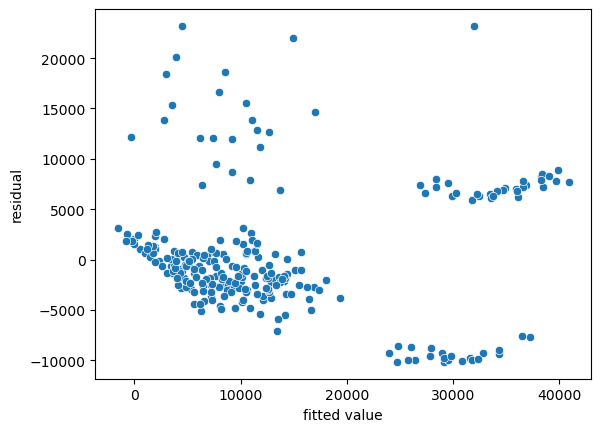

In [75]:
sns.scatterplot(y= residual,x= y_lr_predict)
plt.xlabel('fitted value')
plt.ylabel('residual')
plt.show()

The residuals versus fitted values plot shows no strong non-linear pattern, indicating that the linearity assumption is reasonably satisfied. However, the variance of residuals increases with higher fitted values, suggesting heteroscedasticity, which is common in medical cost data. Overall, the model is suitable as a baseline predictive model.

The residual plot indicates mild heteroscedasticity but no strong non-linearity. This is expected for cost data and does not prevent the model from being used as a reasonable baseline.


#### QQ plot for residuals

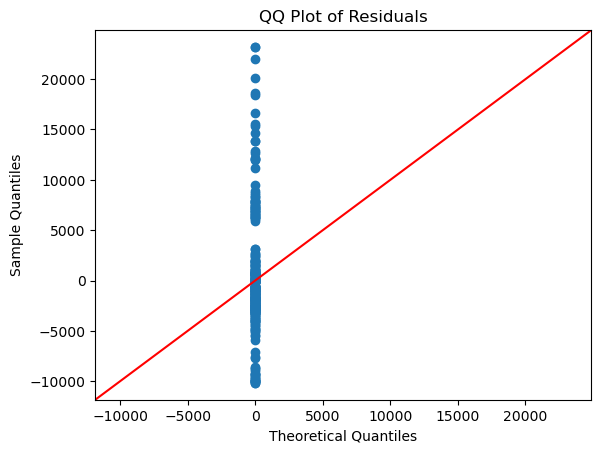

In [76]:
import statsmodels.api as sm
sm.qqplot(residual, line='45')
plt.title("QQ Plot of Residuals")
plt.show()

The QQ plot of residuals shows noticeable deviations from the normal reference line, particularly in the tails, indicating non-normality of residuals. This behavior is expected for medical cost data due to the presence of extreme values. Since the primary objective is prediction rather than inference, this deviation does not invalidate the model.

## Decision Tree Regressor

In [78]:
scoring = {
    'r2': 'r2',
    'rmse': 'neg_root_mean_squared_error',
    'mae': 'neg_mean_absolute_error'
}

In [79]:
dt= DecisionTreeRegressor()

In [80]:
param_dt = {
    'max_depth': [None, 3, 5, 8, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'criterion': ['squared_error', 'absolute_error'],
    'max_features': ['sqrt', 'log2', None]
}

In [81]:
grid_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_dt,
    cv=5,                # 5-fold cross validation
    scoring='r2',      
    n_jobs=-1            # use all CPU cores
)

grid_dt.fit(x_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [None, 3, 5, 8, 12],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2')

In [82]:
grid_dt.best_params_

{'criterion': 'absolute_error',
 'max_depth': 5,
 'max_features': None,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [83]:
grid_dt.best_score_

0.8449075612581354

In [84]:
best_dt = grid_dt.best_estimator_

In [105]:

y_pred = best_dt.predict(x_test)

dt_r2 = r2_score(y_test, y_pred)
dt_rmse = mean_squared_error(y_test, y_pred, squared=False)
dt_mae = mean_absolute_error(y_test, y_pred)

dt_r2, dt_rmse, dt_mae

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(0.8499488048348758, 4845.2030607993565, 2074.5088133015265)

In [131]:
p =  len(np.unique(best_dt.tree_.feature[best_dt.tree_.feature >= 0]))
n=x_test.shape[0]
adj_r2_dt = 1- (1-dt_r2)*(n-1)/(n-p-1)
adj_r2_dt

0.847018117429307

Conclusion
- The best tree is not deep and not aggressive
- So GridSearch successfully prevented overfitting

Interpretation:
- On average, predictions are off by about ₹2,074
- Large mistakes are around ₹4,845 (RMSE penalizes big errors)
- The model generalizes well because CV R² ≈ Test R²

## Random Forest Regressor

In [87]:
rf= RandomForestRegressor()

In [88]:
param_rf = {
    'n_estimators': [200, 500],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True]
}

In [89]:
grid_rf = GridSearchCV(
    rf,
    param_rf,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_rf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [None, 5, 10, 15],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 500]},
             scoring='r2')

In [93]:
grid_rf.best_params_

{'bootstrap': True,
 'max_depth': 5,
 'max_features': None,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 200}

In [94]:
grid_rf.best_score_

0.8556994183566682

In [95]:
best_rf = grid_rf.best_estimator_

In [96]:
y_pred_rf = best_rf.predict(x_test)

rf_r2 = r2_score(y_test, y_pred_rf)
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
rf_mae = mean_absolute_error(y_test, y_pred_rf)

rf_r2, rf_rmse, rf_mae

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(0.8612708272962433, 4658.8223646611095, 2574.8136420134965)

In [132]:
p = np.sum(best_rf.feature_importances_ > 0)
n=x_test.shape[0]
adj_r2_rf = 1- (1-rf_r2)*(n-1)/(n-p-1)
adj_r2_rf

0.8568841340882194

Model Comparison Summary

Linear regression–based models (Linear, Ridge, Lasso, and SGD) achieved an R2 of around 0.74–0.75, indicating that linear relationships alone are not sufficient to capture the complexity of medical insurance charges.

The tuned Decision Tree significantly improved performance with a test R2 of approximately 0.85, confirming the presence of strong non-linear interactions between features such as age, BMI, and smoking status.

Applying Random Forest further improved performance to a test R2 of about 0.86, with a lower RMSE compared to the Decision Tree. This shows that aggregating multiple trees reduces variance and improves generalization. The optimal Random Forest consisted of many shallow, regularized trees, preventing overfitting while retaining predictive power.

Overall, tree-based ensemble methods clearly outperform linear models for this dataset, and Random Forest provides a strong and stable predictive baseline. XGBoost is expected to further improve performance by sequentially correcting residual errors.

## XG Boost Regressor

In [97]:
xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=42
)

In [98]:
param_xgb = {
    'n_estimators': [300, 500],
    'learning_rate': [0.03, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 5]
}

In [99]:
grid_xgb = GridSearchCV(
    xgb,
    param_xgb,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_xgb.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.03, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'n_estimators': [300, 500],
                         'reg_alpha': [0, 0.1], 'reg_lambda': [1, 5],
                         'subsample': [0.8, 1.0]},
             scoring='r2')

In [100]:
grid_xgb.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.03,
 'max_depth': 3,
 'n_estimators': 300,
 'reg_alpha': 0.1,
 'reg_lambda': 5,
 'subsample': 1.0}

In [101]:
grid_xgb.best_score_

0.8549478639616268

In [102]:
best_xgb = grid_xgb.best_estimator_

In [103]:
y_pred_xgb = best_xgb.predict(x_test)

xgb_r2 = r2_score(y_test, y_pred_xgb)
xgb_rmse = mean_squared_error(y_test, y_pred_xgb, squared=False)
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)

xgb_r2, xgb_rmse, xgb_mae

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(0.8659075729897731, 4580.304796603326, 2493.9665388203716)

In [137]:
p = np.sum(best_xgb.feature_importances_ > 0)
n=x_test.shape[0]
adj_r2_xgb = 1- (1-xgb_r2)*(n-1)/(n-p-1)

In [138]:
adj_r2_xgb

0.8616674962463666

In [106]:
results = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'XGBoost'],
    'R2': [dt_r2, rf_r2, xgb_r2],
    'RMSE': [dt_rmse, rf_rmse, xgb_rmse],
    'MAE': [dt_mae, rf_mae, xgb_mae]
})

results

,Model,R2,RMSE,MAE
0,Decision Tree,0.849949,4845.203061,2074.508813
1,Random Forest,0.861271,4658.822365,2574.813642
2,XGBoost,0.865908,4580.304797,2493.966539


In [115]:
comp2 = comp2.rename(columns={
    'model': 'Model',
    'R2_score': 'R2',
    'sqrt_mse': 'RMSE',
    'mae': 'MAE'
})

In [116]:
final_results = pd.concat([comp2,results], ignore_index=True)

In [117]:
final_results

,Model,R2,RMSE,MAE
0,LinearRegression(),0.7468,6043.079,4201.6345
1,"SGDRegressor(learning_rate='constant', max_ite...",0.7435,6123.4008,4452.301
2,Ridge(alpha=0.0001),0.7468,6043.079,4201.6353
3,Lasso(alpha=0.0001),0.7468,6043.079,4201.6345
4,Decision Tree,0.849949,4845.203061,2074.508813
5,Random Forest,0.861271,4658.822365,2574.813642
6,XGBoost,0.865908,4580.304797,2493.966539


Final Model Comparison Summary

Linear regression–based models (Linear, Ridge, Lasso, and SGD) achieved an R2 of about 0.74–0.75, indicating that linear relationships alone are not sufficient to explain the variation in medical insurance charges. This suggests strong non-linear effects and interactions among features such as age, BMI, and smoking status.

The tuned Decision Tree significantly improved performance, reaching a test R2 of 0.85 with much lower RMSE and MAE. This confirms that tree-based models are able to capture complex non-linear patterns present in the data.

Using Random Forest further improved the results to a test R2 of 0.861, showing that averaging many shallow trees reduces variance and improves generalization. The best forest consisted of many regularized trees, avoiding overfitting while producing more stable predictions.

Finally, XGBoost achieved the best overall performance with a test R2 of 0.866 and the lowest RMSE among all models. Its boosting strategy, combined with regularization and feature subsampling, allowed it to correct residual errors and model subtle interactions more effectively than both a single tree and a Random Forest.

Conclusion:
Tree-based ensemble methods strongly outperform linear models on this dataset. Among them, XGBoost is the best model, as it provides the highest predictive accuracy and the lowest prediction error, making it the most suitable choice for predicting medical insurance charges.